# Drag Strip Lab

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kinematics import Kinematic
from uncertainties import ufloat
from uncertainties.umath import *

In [46]:
# Read in the data
df = pd.read_csv('drag_lab.csv')

## Uncertainty

In [47]:
# Measuring devices and their uncertainties
meter_stick = 5e-4
scale = 5e-2
photogate = 5e-5

## Coefficient of Friction Calculation

In [48]:
# Constants
gravity = 9.81

# Masses
cart_mass = ufloat(1.0813, scale)
weight_on_cart = ufloat(2.199, scale)
mass_1 = cart_mass + weight_on_cart # Total cart mass
mass_2 = ufloat(.05, scale) # Mass on pully

# Lengths
displacement = ufloat(1, meter_stick) # meters

# Time
average_time = ufloat(df['time'].mean(), photogate)

# Acceleration
acceleration = Kinematic.a__displacement_v0_t(displacement, 0, average_time)

print(f'Acceleration: {acceleration}')
print(f'Average time: {average_time}')
print(f'\tStandard Deviation: {df["time"].std()}')

Acceleration: 0.11488+/-0.00006
Average time: 4.17245+/-0.00005
	Standard Deviation: 0.15481707277619125


In [49]:
# Coefficient of friction
coefficient_of_friction = \
    (mass_2 * gravity - mass_2 * acceleration - mass_1 * acceleration) / \
        (mass_1 * gravity)

def acceleration_with_friction(mass_1, mass_2, coefficient_of_friction):
    gravity = 9.81
    return (coefficient_of_friction * mass_1 * gravity - mass_2 * gravity + mass_2 * acceleration) / \
        (-mass_1)
# Acceleration with friction
accel = acceleration_with_friction(mass_1, mass_2, coefficient_of_friction)
        
print(f'Coefficient of friction: {coefficient_of_friction}')
print(f'Acceleration with friction: {accel}')

Coefficient of friction: 0.003+/-0.015
Acceleration with friction: 0.11488+/-0.00006


## Prediction

In [50]:
pred_mass_1 = ufloat(3.35813, scale)
pred_mass_2 = ufloat(0.09, scale)

pred_acceleration = acceleration_with_friction(pred_mass_1, pred_mass_2, coefficient_of_friction)

print(pred_acceleration)

0.23+/-0.21


In [51]:
pred_time = Kinematic.t__displacement_v0_a(displacement, 0, pred_acceleration)
print(f'Predicted time: {pred_time}')

Predicted time: 3.0+/-1.4


## Validation

In [52]:
test_times = [3.1256, 3.029, 3.0032, 2.9869, 2.9928]

average_test_time = ufloat(np.mean(test_times), photogate)
print(f'Average test time: {average_test_time}')

Average test time: 3.02750+/-0.00005


In [53]:
valid_percent = 100 - (pred_time / average_test_time * 100)
print(f'Percent Errort: {valid_percent:.2f}%')

Percent Errort: 1.94+/-44.64%


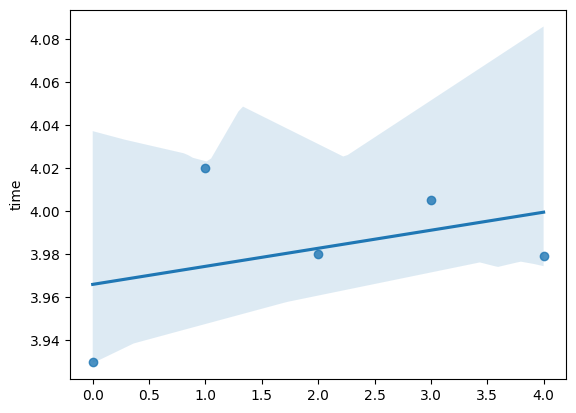

In [56]:
sns.regplot(x=np.arange(5), y=df['time'][:5])
plt.show()